In [74]:
#Long Short Temr Memory (LSTM) deep learning neural network model 

In [75]:
#Import Modules
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [110]:
df = pd.read_csv('BTC_Daily_Final.csv')
df.head()

,Unnamed: 0,Date,Close
0,999,2019-02-15,3602.47
1,998,2019-02-16,3618.41
2,997,2019-02-17,3667.58
3,996,2019-02-18,3898.60
4,995,2019-02-19,3907.79


In [111]:
df.tail()

,Unnamed: 0,Date,Close
995,4,2021-11-06,61470.61
996,3,2021-11-07,63273.59
997,2,2021-11-08,67525.83
998,1,2021-11-09,66947.66
999,0,2021-11-10,67155.31


In [78]:
df.shape

(1000, 3)

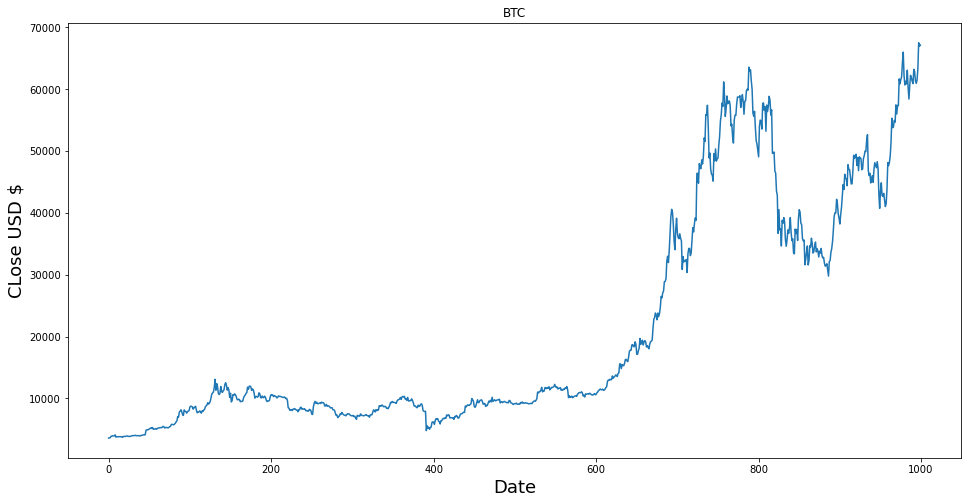

In [79]:
plt.figure(figsize=(16,8))
plt.title('BTC')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('CLose USD $', fontsize = 18)
plt.show()

In [80]:
# Create new frame with only the closing prices

data = df.filter(['Close'])

#Conver to numpy Array

dataset = data.values

#identify Rows

training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

800

In [81]:
#Scale the Data - Normalise input data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00000000e+00],
       [2.49361110e-04],
       [1.01856348e-03],
       [4.63257876e-03],
       [4.77634467e-03],
       [5.74547396e-03],
       [5.23814768e-03],
       [5.62439146e-03],
       [8.06105937e-03],
       [2.20717434e-03],
       [3.52687969e-03],
       [3.23449831e-03],
       [3.37278891e-03],
       [3.30426936e-03],
       [3.44991252e-03],
       [3.40188626e-03],
       [3.21134559e-03],
       [1.76508244e-03],
       [3.99321938e-03],
       [4.05751512e-03],
       [4.24211118e-03],
       [4.10522851e-03],
       [5.32778627e-03],
       [4.91760759e-03],
       [4.21035440e-03],
       [4.38431271e-03],
       [4.12259306e-03],
       [4.29655137e-03],
       [5.02617509e-03],
       [6.31240285e-03],
       [5.92381252e-03],
       [6.02815622e-03],
       [6.46180051e-03],
       [6.89215961e-03],
       [5.91599065e-03],
       [6.01438973e-03],
       [6.31287216e-03],
       [6.09651933e-03],
       [5.21953164e-03],
       [5.41398324e-03],


In [82]:
#Create Training data set

#Create Scaled Training data set
train_data = scaled_data[0:training_data_len, :]
#Split Data x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.        , 0.00024936, 0.00101856, 0.00463258, 0.00477634,
       0.00574547, 0.00523815, 0.00562439, 0.00806106, 0.00220717,
       0.00352688, 0.0032345 , 0.00337279, 0.00330427, 0.00344991,
       0.00340189, 0.00321135, 0.00176508, 0.00399322, 0.00405752,
       0.00424211, 0.00410523, 0.00532779, 0.00491761, 0.00421035,
       0.00438431, 0.00412259, 0.00429655, 0.00502618, 0.0063124 ,
       0.00592381, 0.00602816, 0.0064618 , 0.00689216, 0.00591599,
       0.00601439, 0.00631287, 0.00609652, 0.00521953, 0.00541398,
       0.0068141 , 0.00665391, 0.00783407, 0.00789226, 0.00784502,
       0.00848031, 0.01963007, 0.0208082 , 0.02027725, 0.02194002,
       0.02254919, 0.02452625, 0.02556859, 0.02420915, 0.02668477,
       0.02213432, 0.02261364, 0.02257   , 0.02391661, 0.0222529 ])]
[0.024580216058730342]



In [83]:
#Convert x_train and y_train to numpy arrays to train LSTM
x_train, y_train = np.array(x_train), np.array(y_train)

In [84]:
#Reshape data - must do this for 3 dimensional shape for LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(740, 60, 1)

In [85]:
#LSTM 
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [86]:
#Compile Model
model.compile(optimizer='adam', loss='mean_squared_error')

In [87]:
model.fit(x_train, y_train, batch_size=1, epochs= 2)

Epoch 1/2
740/740 [==============================] - 112s 151ms/step - loss: 0.0035
Epoch 2/2
740/740 [==============================] - 101s 136ms/step - loss: 0.0014


In [88]:
#Test Data set

#Create new array with scaled values

test_data = scaled_data[training_data_len - 60: , :]
#Create Data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [89]:
#Convert data to numpy array
x_test = np.array(x_test)

In [90]:
#Reshape Data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [91]:
#Predictive output
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [92]:
#Evaluate Model - Root Mean Square Error (RMSE) --> Accuracy of Model STD of Residuals
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

#lower the value of RMSE indicates higher level of accuracy of model

3251.62091640625

In [93]:
#Plot Data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

C:\Users\mathi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


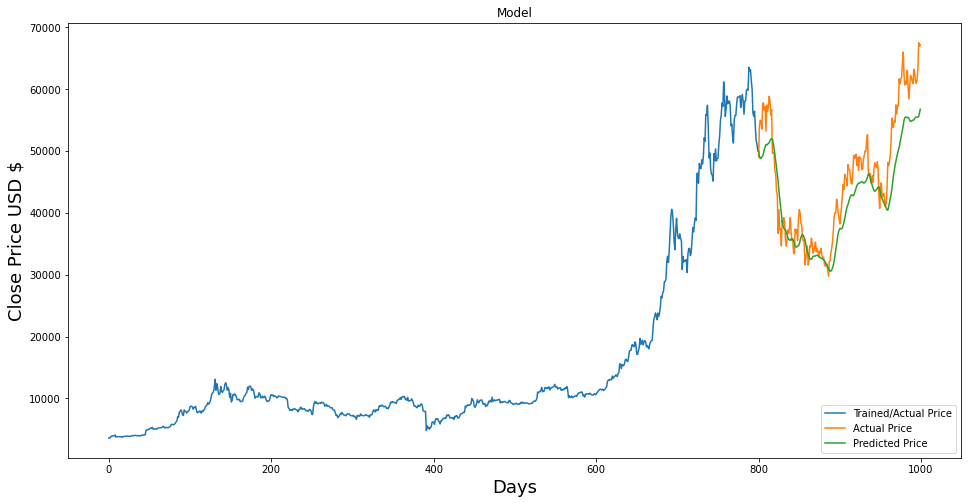

In [94]:
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Days', fontsize = 18)
plt.ylabel('Close Price USD $', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Trained/Actual Price', 'Actual Price', 'Predicted Price'], loc= 'lower right')
plt.show()

In [95]:
valid

,Close,Predictions
800,49066.77,49992.140625
801,54001.39,49108.441406
802,55011.97,48785.488281
803,54846.22,48843.250000
804,53555.00,49060.023438
...,...,...
995,61470.61,55486.269531
996,63273.59,55450.136719
997,67525.83,55577.449219
998,66947.66,56136.628906


In [108]:
results = valid
results

,Close,Predictions
800,49066.77,49992.140625
801,54001.39,49108.441406
802,55011.97,48785.488281
803,54846.22,48843.250000
804,53555.00,49060.023438
...,...,...
995,61470.61,55486.269531
996,63273.59,55450.136719
997,67525.83,55577.449219
998,66947.66,56136.628906


In [97]:
df

,Unnamed: 0,Date,Close
0,999,2019-02-15,3602.47
1,998,2019-02-16,3618.41
2,997,2019-02-17,3667.58
3,996,2019-02-18,3898.60
4,995,2019-02-19,3907.79
...,...,...,...
995,4,2021-11-06,61470.61
996,3,2021-11-07,63273.59
997,2,2021-11-08,67525.83
998,1,2021-11-09,66947.66


In [112]:
df = df[['Date', 'Close']]
df

,Date,Close
0,2019-02-15,3602.47
1,2019-02-16,3618.41
2,2019-02-17,3667.58
3,2019-02-18,3898.60
4,2019-02-19,3907.79
...,...,...
995,2021-11-06,61470.61
996,2021-11-07,63273.59
997,2021-11-08,67525.83
998,2021-11-09,66947.66


In [113]:
df = df.iloc[800:]
df

,Date,Close
800,2021-04-25,49066.77
801,2021-04-26,54001.39
802,2021-04-27,55011.97
803,2021-04-28,54846.22
804,2021-04-29,53555.00
...,...,...
995,2021-11-06,61470.61
996,2021-11-07,63273.59
997,2021-11-08,67525.83
998,2021-11-09,66947.66


In [100]:
results

,Close,Predictions
800,49066.77,49992.140625
801,54001.39,49108.441406
802,55011.97,48785.488281
803,54846.22,48843.250000
804,53555.00,49060.023438
...,...,...
995,61470.61,55486.269531
996,63273.59,55450.136719
997,67525.83,55577.449219
998,66947.66,56136.628906


In [114]:
BTC_LSTM_Results = pd.merge(df, results, on=['Close'])
BTC_LSTM_Results

,Date,Close,Predictions
0,2021-04-25,49066.77,49992.140625
1,2021-04-26,54001.39,49108.441406
2,2021-04-27,55011.97,48785.488281
3,2021-04-28,54846.22,48843.250000
4,2021-04-29,53555.00,49060.023438
...,...,...,...
195,2021-11-06,61470.61,55486.269531
196,2021-11-07,63273.59,55450.136719
197,2021-11-08,67525.83,55577.449219
198,2021-11-09,66947.66,56136.628906
